# DATA-2000 Midterm Exam

## Recipe Rating Prediction

For this exercise, we are going to use a dataset of recipes and their ratings, taken from [the website Epicurious](https://www.epicurious.com/recipes-menus).

Our dataset contains basic information about the dish (its name, description, ingredients, and directions), as well as nutritional content (calories, protein, sodium, and fat contents). Based on this information, we want to try and predict how well or poorly the dish will be rated by users.


## Grading Rubric

This midterm will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Data Prep: 10 points
    - 5 points will be awarded for the actual data cleaning (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale for the data quality checks that you chose to use
  - Feature Engineering: 12 points
    - 2 points will be awarded by default, but may be subtracted from if there are substantial errors in your data prep that reduce the quality of your engineered features
    - 5 points will be awarded for the actual feature engineering (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Building: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your feature engineering that reduce the quality of your model
    - 5 points will be awarded for the actual model building (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 14 points
    - 4 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 5 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 5 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not


## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [ ]:
import pandas as pd

data = pd.read_json('https://cdn.c18l.org/full_format_recipes.json')

In [ ]:
data.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


## Data Prep & Cleaning

Perform any data quality checks and data cleaning that you believe is appropriate. Convert any categorical columns to numeric ones, if needed. Provide a narrative explanation of your choices to accompany any code.

I'll start by checking the numeric columns for scale, distribution, and missingness. If we have columns on widely different scales, we'll just need to do some normalization (either here or in the model DAG if we're using a neural network). We might have to do some transforms if distributions are highly non-normal, and may either drop rows or impute data if there's missingness

In [ ]:
data.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


So at a glance it looks like about 20% of our records don't have any nutritional information associated with them so we might want to just go ahead and drop those 4k-odd records without this information attached. I'll keep them in for now and just zero the values out, but if model performance tanks we can always revisit this and just remove them from the dataset outright.

It also looks like we've got some really, really high outliers on the upper end of fat / calories / protein / sodium. These are probably meals that are meant to serve a large number of guests as opposed to just being bad data, but I think I will still go ahead and remove them just because they aren't directly comparable to the majority of the other dishes unless we're able to figure out how many servings each recipe is supposed to yield and compute normalized "nutritional value per serving" columns. I might investigate this later on, but if serving size isn't well represented in the recipe description then I'll likely just drop these records.

Actually, let's just check now real quick:

In [ ]:
print(
    data.loc[
        data['desc'].str.contains('serves') == True,
        'desc'
    ].head().tolist()
)

print(
    data.loc[
        data['desc'].str.contains('servings') == True,
        'desc'
    ].head().tolist()
)

['Classic spoon bread is a savory pudding served as a side dish. In this dessert version, the slightly sweetened batter is baked in individual ramekins, then topped with strawberry preserves.', 'This moist and fluffy dessert uses toasted coconut, coconut milk, and coconut oil to infuse as much flavor as possible into the cake. Good thing this sheet cake serves a crowd—the creamy key lime topping will have your guests coming back for a second piece.', "Málaga Tapas & Bar gets its name from a city on Spain's southern coast — and from the authentic savory appetizers and snacks it serves with wine and other drinks, in the Andalusian tapas tradition. Málaga, located in Austin's trendy Warehouse District, is a favorite among the after-work and late-night crowds. This recipe for sangria comes from the restaurant's bar manager and resident wine expert, Merrill Frank.", 'These cocktails are as much fun to drink as they are to say. Tony Oltranti adds freshly squeezed orange juice to a traditiona

So just some quick pattern matching doesn't look like it'll help super consistenly for getting number of servings. In that case, I'll just drop these records from our data entirely:

In [ ]:
data = data.dropna(
    how='any',
    subset=[
        'fat',
        'calories',
        'protein',
        'sodium',
        'rating'
    ]
)

data.shape

(15896, 11)

In [ ]:
data = data.loc[
    (data['fat'] < 300) &
    (data['calories'] < 2000) &
    (data['protein'] < 300) &
    (data['sodium'] < 2000),
    :
]

data.shape
data.describe()

,fat,calories,protein,rating,sodium
count,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000
mean,22.967699,409.651400,16.626150,3.755456,410.297025
std,23.419926,317.068368,22.621961,1.284906,433.889911
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,195.000000,3.000000,3.750000,72.000000
50%,17.000000,316.000000,7.000000,4.375000,256.000000
75%,30.000000,540.000000,23.000000,4.375000,610.000000
max,194.000000,1993.000000,264.000000,5.000000,1997.000000


Lastly, I'll just replace and NAs in the `description` column with empty strings to make life easier engineering some features in a little while. I'll also reset the row indices just so they're a little easier to follow:

In [ ]:
import numpy as np


data['directions'] = data['directions'].replace(np.nan, '')
data = data.reset_index()

## Feature Engineering

Develop any new feature(s) that you feel may be relevant to a model. Provide a narrative explanation of your choices to accompany any code.

To help, I've included a `column_builder()` utility function that will create a new boolean column based on whether a string of text appears in any of (1) the recipe title; (2) the recipe description; or (3) the recipe tags.

In [ ]:
def column_builder(category: str, dataset: pd.DataFrame) -> pd.DataFrame:
    dataset[f'is_{category.replace(" ", "_")}'] = ((
        dataset['categories'].apply(lambda x: category in x)
    ) | (
        dataset['title'].str.contains(f'{category}', na=False, case=False)
    ) | (
        dataset['desc'].str.contains(f'{category}', na=False, case=False)
    )).astype(int)

    return dataset

A couple new features I'd like to consider looking at include:

  - Number of ingredients
  - Number of steps to cook
  - Total cooking time

I might also take a look at what tags appear the most often in the dataset and create a couple boolean columns based on them.

Broadly, I'd guess that more complex and time-consuming recipes may have a different distribution of ratings than shorter, easier ones. Not sure that they'd be rated better or worse on average, just probably catering to different subpopulations of at-home cooks

In [ ]:
data['num_ingredients'] = data['ingredients'].apply(
    lambda x: len(x)
)

data['num_steps'] = data['directions'].apply(
    lambda x: len(x)
)

In [ ]:
import re


# Start by using a regex to get number of hours and minutes mentioned
# in any step of the directions and extract that to a new list
data['mins'] = data['directions'].apply(
    lambda x: [
        re.search(r'([0-9]{1,2} (?:min|hour))', elem)
        for elem in x
    ]
).apply(
    lambda x: [
        elem.group() for elem in x if elem is not None
    ]
)

# We'll then go through and split the numeric portion and the
# unit (hour or minute)
data['mins'] = data['mins'].apply(
    lambda x: [elem.split() for elem in x]
)

# And finally convert any hours into minutes, and add
# it all up for a total cooking minutes tally
data['mins'] = data['mins'].apply(
    lambda x: sum([
        int(elem[0]) if elem[1] == 'min'
        else int(elem[0]) * 60
        for elem in x
    ])
)

In [ ]:
data['mins'].head()

0     30
1    173
2     10
3     45
4      8
Name: mins, dtype: int64

Let's just sanity check one of our rows to make sure that things look alright for our calculated cook time:

In [ ]:
data.loc[4, ['directions', 'mins']].tolist()

[['Mix basil, mayonnaise and butter in processor until basil is finely chopped and mixture is well blended. Season to taste with salt and pepper. (Can be made 1 day ahead. Cover and refrigerate.)',
  'Cook bacon in heavy large skillet over medium-high heat until crisp, about 8 minutes. Transfer to paper towels; drain.',
  'Spread half of mayonnaise mixture over 1 side of 6 bread slices. Top each with 2 tomato slices. Sprinkle tomatoes with salt and pepper. Top tomato slices with avocado, then with bacon strips, onion and lettuce. Spread remaining mayonnaise mixture over remaining 6 bread slices. Place bread slices atop lettuce. Cut sandwiches in half and serve.'],
 8]

Seems to check out! We're correctly showing a whopping 8 minutes prep time :-)

Lastly, let's see if there are any tags which are used frequently enough to maybe be useful features in our model:

In [ ]:
from collections import Counter


counts = Counter(
    x for sublist in data['categories'].tolist() for x in sublist
).most_common()
counts[0:10]

[('Bon Appétit', 6964),
 ('Peanut Free', 6344),
 ('Soy Free', 6158),
 ('Vegetarian', 5383),
 ('Gourmet', 5359),
 ('Tree Nut Free', 5278),
 ('Kosher', 4824),
 ('Pescatarian', 4713),
 ('Quick & Easy', 4041),
 ('Wheat/Gluten-Free', 3719)]

Okay awesome, it looks like we've got a couple of tags that are decently well represented so I will go ahead and make a few binary columns from them

In [ ]:
categories = [elem[0] for elem in counts[0:4]]

for category in categories:
    data = column_builder(category, data)

data.describe()

,index,fat,calories,protein,rating,sodium,num_ingredients,num_steps,mins,is_Bon_Appétit,is_Peanut_Free,is_Soy_Free,is_Vegetarian
count,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000,14891.000000
mean,10038.480156,22.967699,409.651400,16.626150,3.755456,410.297025,9.875227,3.414479,74.478007,0.467665,0.426029,0.413538,0.362501
std,5813.441366,23.419926,317.068368,22.621961,1.284906,433.889911,4.498445,2.283233,175.595441,0.498970,0.494515,0.492484,0.480738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4973.500000,7.000000,195.000000,3.000000,3.750000,72.000000,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,10048.000000,17.000000,316.000000,7.000000,4.375000,256.000000,9.000000,3.000000,22.000000,0.000000,0.000000,0.000000,0.000000
75%,15059.500000,30.000000,540.000000,23.000000,4.375000,610.000000,12.000000,5.000000,65.000000,1.000000,1.000000,1.000000,1.000000
max,20128.000000,194.000000,1993.000000,264.000000,5.000000,1997.000000,51.000000,24.000000,4320.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

Build a model (either a regression or a neural network) to predict a recipe's rating based on any relevant attributes that you defined in the prior steps.

You may choose to predict rating as a continuous value (0.0 to 5.0), or as a categorical (low/medium/high or similar).

Provide a narrative explanation of your choices to accompany any code.

In [ ]:
data = data.loc[:, [
    'fat',
    'calories',
    'protein',
    'sodium',
    'num_ingredients',
    'num_steps',
    'mins',
    'is_Bon_Appétit',
    'is_Peanut_Free',
    'is_Soy_Free',
    'is_Vegetarian',
    'rating'
]]

data.head()

,fat,calories,protein,sodium,num_ingredients,num_steps,mins,is_Bon_Appétit,is_Peanut_Free,is_Soy_Free,is_Vegetarian,rating
0,7.0,426.0,30.0,559.0,15,3,30,0,0,0,0,2.500
1,23.0,403.0,18.0,1439.0,28,5,173,1,0,0,0,4.375
2,7.0,165.0,6.0,165.0,6,2,10,0,0,0,0,3.750
3,32.0,547.0,20.0,452.0,6,1,45,1,0,0,1,3.125
4,79.0,948.0,19.0,1042.0,9,3,8,1,0,0,0,4.375


I'll create training, validation, and testing splits of our base dataset:

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, data.columns != 'rating'],
    data['rating'],
    test_size=0.2,
    random_state=42,
    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    shuffle=True)

And now we can start defining our model. For this model, I'm going to just mess around a little bit since we've got a mix of numeric features that will need to be normalized, as well as boolean features. I'm guessing they won't play nicely together if we just throw them all into a pile, so we'll treat them separately to start and then concatenate them down the line.

In [ ]:
import tensorflow as tf


# The last column that I defined is our target, so we'll
# exclude that from our list of inputs
input_cols = data.columns.tolist()[:-1]

input_layers = {
    colname: tf.keras.layers.Input(
        shape=(1,),
        dtype=tf.float32,
        name=f'{colname}')
    for colname in input_cols
}

As mentioned, I'm just going to create Normalization layers for each of our numeric columns in the dataset and will scale those to our training data distributions:

In [ ]:
norm_cols = [
    'fat',
    'calories',
    'protein',
    'sodium',
    'mins'
]

norm_layers = {
    col: tf.keras.layers.Normalization(
        name=f'normalization_{col}',
        axis=None)
    for col in norm_cols
}

for col in norm_cols:
    norm_layers[col].adapt(X_train[col])
    norm_layers[col] = norm_layers[col](input_layers.get(col))

Now I'll create two separate concatenation layers: one for the normalized features, and one for just the binary features

In [ ]:
preprocessing_layers = tf.keras.layers.Concatenate()(
    [layer for layer in norm_layers.values()]
)

preprocessing_layers_binary = tf.keras.layers.Concatenate()(
    [layer for key, layer in input_layers.items() if key not in norm_cols]
)

From here it's all pretty standard stuff: each of the concatenated layers will feed into a dense layer, and then into a Batch Normalization layer. This should help smooth out any differences in scale between the normalized numeric features and the binary ones.

Once we've got both batch norm layers, we can concatenate them together and feed it all into a couple of dense layers, ultimately terminating in our relu output layer.

In [ ]:
norm_hidden = tf.keras.layers.Dense(
    units=64,
    activation='relu',
    name='norm_hidden')(preprocessing_layers)
norm_batch = tf.keras.layers.BatchNormalization(
    name='norm_batchnorm'
)(norm_hidden)


binary_hidden = tf.keras.layers.Dense(
    units=24,
    activation='sigmoid',
    name='hidden1_binary')(preprocessing_layers_binary)
binary_batch = tf.keras.layers.BatchNormalization(
    name='binary_batchnorm'
)(binary_hidden)


hidden_merged = tf.keras.layers.Concatenate(name='hidden_concat')(
    [norm_batch, binary_batch])
hidden2 = tf.keras.layers.Dense(
    units=32,
    activation='relu',
    name='hidden2')(hidden_merged)
hidden3 = tf.keras.layers.Dense(
    units=12,
    activation='relu',
    name='hidden3')(hidden2)


dense_output = tf.keras.layers.Dense(
    units=1,
    activation='relu',
    name='dense_output')(hidden3)

# Define an output dictionary we'll send to the model constructor.
output_layer = {
'dense_output': dense_output
}

Since I'm making a continuous prediction, accuracy isn't going to be a great metric to rely on; I'll choose to use Mean Absolute Error (MAE) instead. No real reason for this instead of MSE, it's just a litte easier for me to interpret at a glance than if I'm trying to do square roots in my head.

I'll also use the Adam optimizer with the default learning rate.

In [ ]:
dnn_model = tf.keras.Model(inputs=input_layers, outputs=output_layer)
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

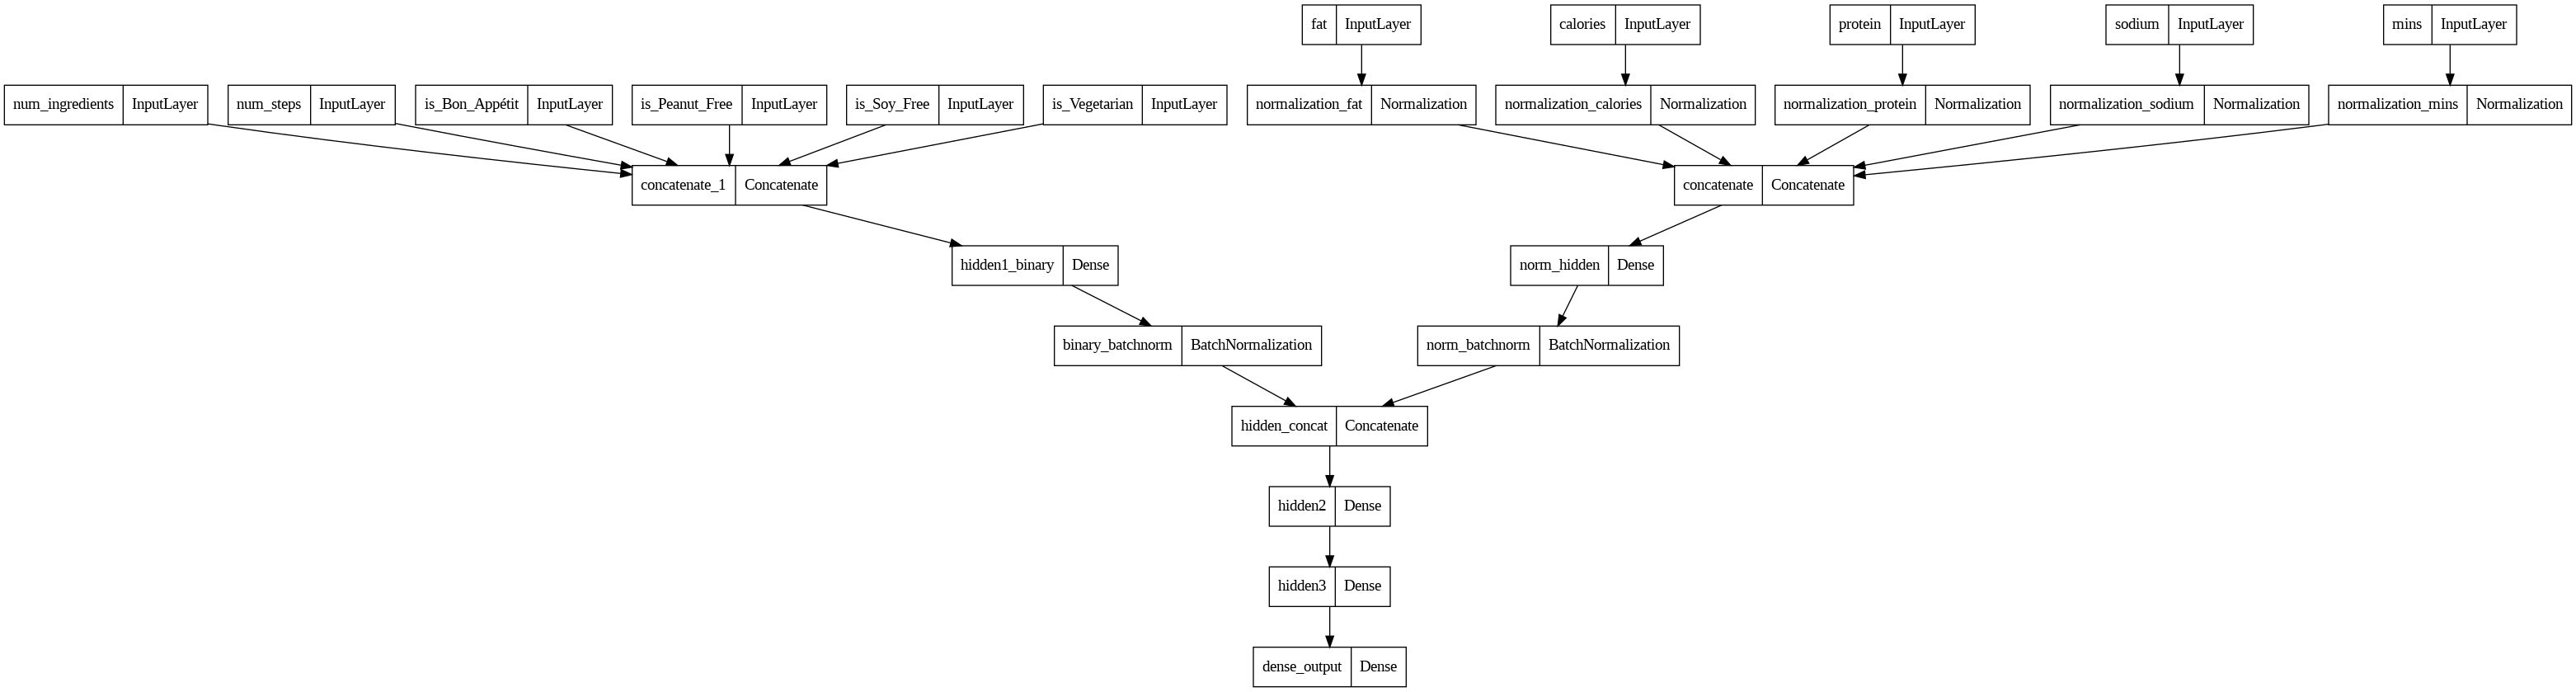

In [ ]:
tf.keras.utils.plot_model(dnn_model)

In [ ]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
    df = dataframe.copy()
    df = {key: value.values for key, value in dataframe.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.batch(batch_size)
        ds = ds.prefetch(batch_size)
    return ds

train_ds = df_to_dataset(X_train, y_train)
val_ds = df_to_dataset(X_val, y_val)
test_ds = df_to_dataset(X_test, y_test)

In [ ]:
history = dnn_model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
mae = hist["mean_absolute_error"]

Epoch 1/15
298/298 [==============================] - 1s 2ms/step - loss: 1.0611 - mean_absolute_error: 1.0611 - val_loss: 1.4070 - val_mean_absolute_error: 1.4070
Epoch 2/15
298/298 [==============================] - 0s 1ms/step - loss: 0.8576 - mean_absolute_error: 0.8576 - val_loss: 0.8346 - val_mean_absolute_error: 0.8346
Epoch 3/15
298/298 [==============================] - 0s 1ms/step - loss: 0.8315 - mean_absolute_error: 0.8315 - val_loss: 0.8132 - val_mean_absolute_error: 0.8132
Epoch 4/15
298/298 [==============================] - 0s 1ms/step - loss: 0.8231 - mean_absolute_error: 0.8231 - val_loss: 0.8398 - val_mean_absolute_error: 0.8398
Epoch 5/15
298/298 [==============================] - 0s 1ms/step - loss: 0.8073 - mean_absolute_error: 0.8073 - val_loss: 0.8155 - val_mean_absolute_error: 0.8155
Epoch 6/15
298/298 [==============================] - 0s 1ms/step - loss: 0.7981 - mean_absolute_error: 0.7981 - val_loss: 0.8255 - val_mean_absolute_error: 0.8255
Epoch 7/15
298/2

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

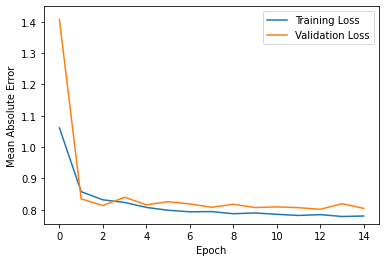

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")

plt.plot(epochs, mae, label="Training Loss")
plt.plot(epochs, history.history["val_mean_absolute_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mae_lists = mae.tolist() + history.history["val_mean_absolute_error"]
highest_loss = max(merged_mae_lists)
lowest_loss = min(merged_mae_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

So clearly it's not the greatest predictor ever: our MAE ends up around 0.78. So we're within about a single star rating up or down. Could be worse, but definitely isn't the best either if a 3-star recipe could be predicted at anywhere from 2.2 to 3.8 stars on average. I might go back and normalize the it's not very normally distributed (the median rating is like 4.3 stars) and that's probably contributing to some of the issues that we're seeing in the trained model

In [ ]:
dnn_model.evaluate(
    test_ds,
    return_dict=True)

94/94 [==============================] - 0s 792us/step - loss: 0.7856 - mean_absolute_error: 0.7856


{'loss': 0.7855920791625977, 'mean_absolute_error': 0.7855920791625977}

-----

# Midterm Submission

To submit this exam, in Canvas navigate to DATA-2000-51 > Assignments > Midterm Exam ([link](https://canvas.jcu.edu/courses/33514/assignments/407120)). You can either upload the `.ipynb` file directly to Canvas, or you can provide a link to the assignment on your GitHub.